# Importing libraries

In [ ]:
#Importing pandas and numpy array
import numpy as np 
import pandas as pd

In [3]:
import os
print(os.listdir("G:\\Desktop\\Priyanka\\new"))

['gastro', 'skin cancer', 'ulcer', 'brain tumor', 'chest-pneumonia', 'polyp']


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
#Removing the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning) 
pd.options.display.max_columns = 100
import pylab as plot
import cv2
import glob
import keras
# Keras is an open-source neural-network library written in Python. 
#It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, Theano, or PlaidML
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from matplotlib import pyplot

Using TensorFlow backend.


# Resizing Images

In [5]:
images1 = []
targets1 = []



path1 = "G:\\Desktop\\Priyanka\\new\\brain tumor"
path2 = "G:\\Desktop\\Priyanka\\new\\chest-pneumonia"
path3 = "G:\\Desktop\\Priyanka\\new\\gastro"
path4 = "G:\\Desktop\\Priyanka\\new\\skin cancer"
path5 = "G:\\Desktop\\Priyanka\\new\\ulcer"
path6 = "G:\\Desktop\\Priyanka\\new\\polyp"


for i in glob.glob(os.path.join(path1,'*JPG')):
    img = cv2.imread(i)
    img = cv2.resize(img,(50,50)) #resize 
    images1.append(np.array(img))
    targets1.append(0)
    
for j in glob.glob(os.path.join(path2,'*JPEG')):
    img = cv2.imread(j)
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(1)    
    
    
for k in glob.glob(os.path.join(path3,'*JPG')):
    img = cv2.imread(k)
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(2)
    
for l in glob.glob(os.path.join(path4,'*JPG')):
    img = cv2.imread(l)
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(3) 
    
for m in glob.glob(os.path.join(path5,'*JPG')):
    img = cv2.imread(m)
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(4)
    
for n in glob.glob(os.path.join(path6,'*jpg')):
    img = cv2.imread(n)
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(5)

In [6]:
#Storing the images into a numpy array
disease_images1 , disease_labels1 = np.array(images1), np.array(targets1)    
np.save("disease_images1",disease_images1)
np.save("disease_labels1",disease_labels1)

In [7]:
#Loading and splitting the images into a train and test set
the_disease_images1, the_disease_labels1 = np.load("disease_images1.npy"), np.load("disease_labels1.npy")

In [8]:
#Startify sampling to get a equal share of classes in the test set
X_train, X_test, Y_train, Y_test = train_test_split(the_disease_images1,
                                                    the_disease_labels1, 
                                                    stratify=the_disease_labels1, 
                                                    test_size=0.2)
#converting to float and normalizing
X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/255
    


num_classes = 6

#Converting to categorical variables    
Y_train=keras.utils.to_categorical(Y_train,num_classes)
Y_test=keras.utils.to_categorical(Y_test,num_classes )

In [9]:
print (disease_labels1.shape)

(6259,)


# Creating a Convolutional Neural Network

In [10]:
from keras.layers import  Dropout
from keras.layers import Dense, Activation

In [11]:
#Creates a model layer by layer
classifier = Sequential()

W0821 18:39:09.864136 13540 deprecation_wrapper.py:119] From C:\Users\ec18491\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [12]:
#Adding 1st Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), 
                      strides=(1,1), 
                      input_shape=(50,50,3), 
                      activation='relu', 
                      padding='same'))

#Adding 1st MaxPooling Layer to reduce the size of feature map
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))
#Reduce overfitting with the help of dropout regularization
classifier.add(Dropout(0.2))

W0821 18:39:13.556545 13540 deprecation_wrapper.py:119] From C:\Users\ec18491\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 18:39:13.556545 13540 deprecation_wrapper.py:119] From C:\Users\ec18491\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 18:39:13.571557 13540 deprecation_wrapper.py:119] From C:\Users\ec18491\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 18:39:13.571557 13540 deprecation_wrapper.py:119] From C:\Users\ec18491\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compa

In [13]:
#Adding 2nd Convolution Layer
classifier.add(Conv2D(filters=16, kernel_size=(3,3), 
                      strides=(1,1), 
                      activation='relu', 
                      padding='same'))

#Adding 2nd MaxPooling Layer to reduce the size of feature map
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


In [14]:
#Flattening the layers
classifier.add(Flatten())

In [15]:
classifier.add(Dense(units=32,activation='relu'))

#Adding Output Layer
classifier.add(Dense(units=6,activation='softmax'))

In [16]:
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                73760     
__________

In [17]:
#Setting the parameters of the classifier
classifier.compile( loss='categorical_crossentropy',
                   optimizer='sgd',
                metrics=['mae', 'accuracy'])

W0821 18:39:30.609017 13540 deprecation_wrapper.py:119] From C:\Users\ec18491\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 18:39:30.626510 13540 deprecation_wrapper.py:119] From C:\Users\ec18491\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [18]:
#Fitting the classifier
history = classifier.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=100,
                            verbose=1)

W0821 18:39:34.708677 13540 deprecation.py:323] From C:\Users\ec18491\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5007 samples, validate on 1252 samples
Epoch 1/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.9255 - mean_absolute_error: 0.1640 - acc: 0.6565 - val_loss: 0.4241 - val_mean_absolute_error: 0.0853 - val_acc: 0.8570
Epoch 2/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.3470 - mean_absolute_error: 0.0680 - acc: 0.8614 - val_loss: 0.3330 - val_mean_absolute_error: 0.0635 - val_acc: 0.8634
Epoch 3/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.2630 - mean_absolute_error: 0.0542 - acc: 0.8854 - val_loss: 0.2710 - val_mean_absolute_error: 0.0521 - val_acc: 0.8730
Epoch 4/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.2303 - mean_absolute_error: 0.0476 - acc: 0.8963 - val_loss: 0.2459 - val_mean_absolute_error: 0.0484 - val_acc: 0.8922
Epoch 5/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.2265 - mean_absolute_error: 0.0459 - acc: 0.8979 - val_loss: 0.2461 - val_mea

Epoch 42/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.1390 - mean_absolute_error: 0.0300 - acc: 0.9363 - val_loss: 0.2106 - val_mean_absolute_error: 0.0357 - val_acc: 0.9177
Epoch 43/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.1388 - mean_absolute_error: 0.0294 - acc: 0.9389 - val_loss: 0.2038 - val_mean_absolute_error: 0.0340 - val_acc: 0.9185
Epoch 44/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.1419 - mean_absolute_error: 0.0297 - acc: 0.9357 - val_loss: 0.2165 - val_mean_absolute_error: 0.0366 - val_acc: 0.9153
Epoch 45/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.1342 - mean_absolute_error: 0.0291 - acc: 0.9417 - val_loss: 0.1882 - val_mean_absolute_error: 0.0323 - val_acc: 0.9289
Epoch 46/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.1331 - mean_absolute_error: 0.0286 - acc: 0.9383 - val_loss: 0.2839 - val_mean_absolute_error: 0.0419 - val_acc: 0.8882


Epoch 83/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.0968 - mean_absolute_error: 0.0214 - acc: 0.9579 - val_loss: 0.2319 - val_mean_absolute_error: 0.0329 - val_acc: 0.9169
Epoch 84/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.0970 - mean_absolute_error: 0.0212 - acc: 0.9575 - val_loss: 0.2371 - val_mean_absolute_error: 0.0311 - val_acc: 0.9201
Epoch 85/100
5007/5007 [==============================] - 9s 2ms/step - loss: 0.0940 - mean_absolute_error: 0.0206 - acc: 0.9587 - val_loss: 0.2235 - val_mean_absolute_error: 0.0307 - val_acc: 0.9217
Epoch 86/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.0933 - mean_absolute_error: 0.0204 - acc: 0.9605 - val_loss: 0.2334 - val_mean_absolute_error: 0.0320 - val_acc: 0.9193
Epoch 87/100
5007/5007 [==============================] - 8s 2ms/step - loss: 0.0911 - mean_absolute_error: 0.0198 - acc: 0.9613 - val_loss: 0.2242 - val_mean_absolute_error: 0.0309 - val_acc: 0.9241


In [19]:
#Evaluating the test score
score = classifier.evaluate(X_test, Y_test, verbose=1)
print('\n', 'Test_Loss:-', score[0])
print('\n', 'Val_MAE:-', score[1])
print('\n', 'Test_Accuracy:-', score[2]*100 ) 

1252/1252 [==============================] - 0s 283us/step

 Test_Loss:- 0.26276170950347244

 Val_MAE:- 0.03160986466148791

 Test_Accuracy:- 91.77316293929712


<Figure size 432x288 with 0 Axes>

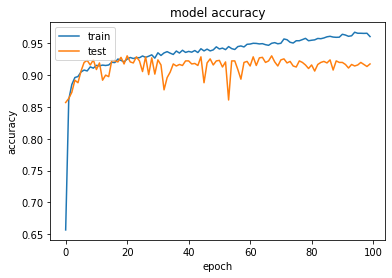

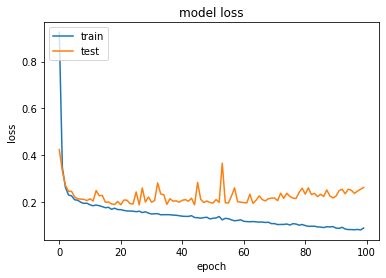

<Figure size 432x288 with 0 Axes>

In [20]:
#Plotting The model accuracy and loss against epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.figure()
# summarize history for loss
  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.figure() 

<Figure size 432x288 with 0 Axes>

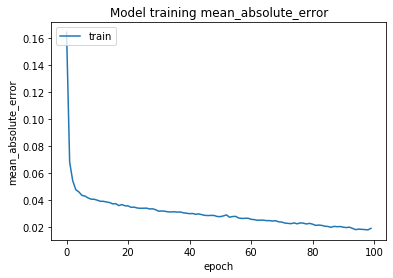

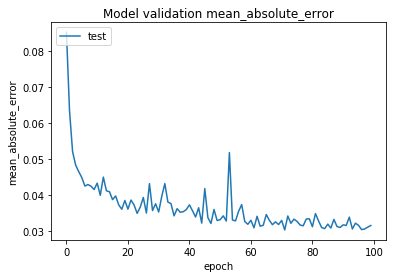

<Figure size 432x288 with 0 Axes>

In [21]:
#Plotting training and validation mean absolute error
plt.plot(history.history['mean_absolute_error'])
plt.title('Model training mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.figure()

plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model validation mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['test' ], loc='upper left')
plt.figure()

In [22]:
#Printing the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred=classifier.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1) 
y_true = Y_test
y_true=np.argmax(y_true, axis=1) 

cm = confusion_matrix(y_true, y_pred)
cm

array([[ 28,   3,   0,   0,   0,   0],
       [  0, 330,   0,   0,   0,   0],
       [  0,   1, 195,   2,   2,   0],
       [  0,   1,   0, 290,   0,   0],
       [  0,   0,   0,   0, 135,  65],
       [  0,   0,   4,   0,  25, 171]], dtype=int64)

# Testing the model on unseen images

[[1. 0. 0. 0. 0. 0.]]


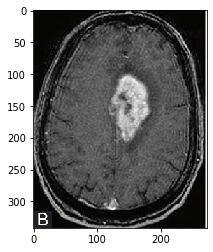

In [30]:
imgPred = cv2.imread("/Desktop/Unseen/brain30.jpg")
plt.imshow(imgPred)
imgPred = cv2.resize(imgPred, (50,50))
imgPred= imgPred.reshape(1,50,50,3)
pred =classifier.predict(imgPred)
print(pred)


[[0. 0. 0. 1. 0. 0.]]


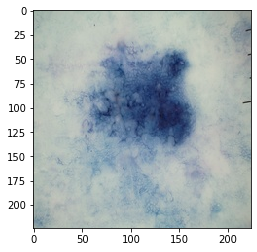

In [26]:
imgPred = cv2.imread("/Desktop/Unseen/skin cancer 3.jpg")
plt.imshow(imgPred)
imgPred = cv2.resize(imgPred, (50,50))
imgPred= imgPred.reshape(1,50,50,3)
pred =classifier.predict(imgPred)
print( (pred))


[[0. 1. 0. 0. 0. 0.]]


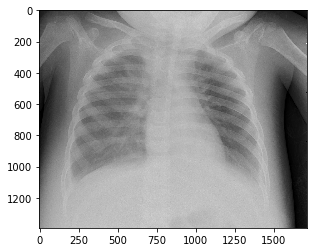

In [27]:
imgPred = cv2.imread("/Desktop/Unseen/chest 45.jpeg")
plt.imshow(imgPred)
imgPred = cv2.resize(imgPred, (50,50))
imgPred= imgPred.reshape(1,50,50,3)
pred =classifier.predict(imgPred)
print( (pred))

[[0. 0. 1. 0. 0. 0.]]


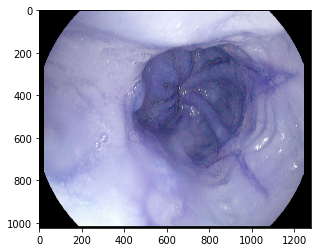

In [28]:
imgPred = cv2.imread("/Desktop/Unseen/esophagitis 42.jpg")
plt.imshow(imgPred)
imgPred = cv2.resize(imgPred, (50,50))
imgPred= imgPred.reshape(1,50,50,3)
pred =classifier.predict(imgPred)
print( (pred))

[[0. 0. 0. 0. 0. 1.]]


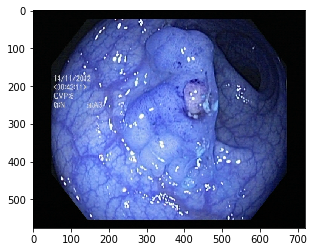

In [29]:
imgPred = cv2.imread("/Desktop/Unseen/polyp 47.jpg")
plt.imshow(imgPred)
imgPred = cv2.resize(imgPred, (50,50))
imgPred= imgPred.reshape(1,50,50,3)
pred =classifier.predict(imgPred)
print( (pred))

[[0. 0. 0. 0. 1. 0.]]


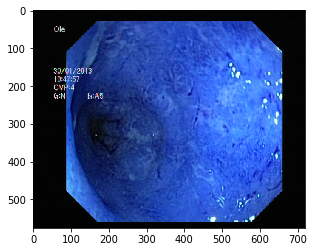

In [30]:
imgPred = cv2.imread("/Desktop/Unseen/ulcer 8.jpg")
plt.imshow(imgPred)
imgPred = cv2.resize(imgPred, (50,50))
imgPred= imgPred.reshape(1,50,50,3)
pred =classifier.predict(imgPred)
print( (pred))

In [23]:
#Calculating Precision ,Recall ,F1-score and support of the fitted model
from sklearn.metrics import classification_report


print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.99      1.00      1.00       330
           2       0.99      0.98      0.99       200
           3       0.99      1.00      0.99       291
           4       0.69      0.85      0.76       200
           5       0.81      0.60      0.69       200

    accuracy                           0.91      1252
   macro avg       0.91      0.91      0.91      1252
weighted avg       0.92      0.91      0.91      1252



# Comparing different optimizers

In [24]:
#RMSprop optimizer
classifier= Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(50, 50,3), activation='relu', padding='same'))

classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))

classifier.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))

classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(units=32,activation='relu'))

classifier.add(Dense(units=6,activation='softmax') )
classifier.compile( loss='categorical_crossentropy',
                   optimizer='rmsprop',
                metrics=[ 'accuracy'])
history1 = classifier.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=10,
                            verbose=1)

Train on 5007 samples, validate on 1252 samples
Epoch 1/10
5007/5007 [==============================] - 7s 1ms/step - loss: 0.4619 - acc: 0.8145 - val_loss: 0.4730 - val_acc: 0.7891
Epoch 2/10
5007/5007 [==============================] - 8s 2ms/step - loss: 0.2336 - acc: 0.8993 - val_loss: 0.2165 - val_acc: 0.9018
Epoch 3/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.2054 - acc: 0.9127 - val_loss: 0.1969 - val_acc: 0.9105
Epoch 4/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.1873 - acc: 0.9181 - val_loss: 0.1791 - val_acc: 0.9073
Epoch 5/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.1766 - acc: 0.9205 - val_loss: 0.4378 - val_acc: 0.8570
Epoch 6/10
5007/5007 [==============================] - 10s 2ms/step - loss: 0.1637 - acc: 0.9281 - val_loss: 0.1897 - val_acc: 0.9097
Epoch 7/10
5007/5007 [==============================] - 10s 2ms/step - loss: 0.1564 - acc: 0.9379 - val_loss: 0.1721 - val_acc: 0.9241
Epoch 8/10
5

In [25]:
#adam optimizer
classifier = Sequential()

classifier.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(50,50,3), activation='relu', padding='same'))

classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))

classifier.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))

classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(units=32,activation='relu'))

classifier.add(Dense(units=6,activation='softmax') )
classifier.compile( loss='categorical_crossentropy',
                   optimizer=Adam(),
                metrics=['accuracy'])
history2= classifier.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=10,
                            verbose=1)

Train on 5007 samples, validate on 1252 samples
Epoch 1/10
5007/5007 [==============================] - 8s 2ms/step - loss: 0.4493 - acc: 0.8149 - val_loss: 0.2373 - val_acc: 0.8954
Epoch 2/10
5007/5007 [==============================] - 8s 2ms/step - loss: 0.2009 - acc: 0.9177 - val_loss: 0.2113 - val_acc: 0.9026
Epoch 3/10
5007/5007 [==============================] - 8s 2ms/step - loss: 0.1864 - acc: 0.9181 - val_loss: 0.2019 - val_acc: 0.9081
Epoch 4/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.1892 - acc: 0.9163 - val_loss: 0.2023 - val_acc: 0.8970
Epoch 5/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.1734 - acc: 0.9211 - val_loss: 0.1844 - val_acc: 0.9105
Epoch 6/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.1602 - acc: 0.9319 - val_loss: 0.1718 - val_acc: 0.9185
Epoch 7/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.1580 - acc: 0.9307 - val_loss: 0.2087 - val_acc: 0.9058
Epoch 8/10
500

In [26]:
#SGD optimizer
classifier = Sequential()

classifier.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(50,50,3), activation='relu', padding='same'))

classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))

classifier.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))

classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(units=32,activation='relu'))

classifier.add(Dense(units=6,activation='softmax') )
classifier.compile( loss='categorical_crossentropy',
                   optimizer='sgd',
                metrics=['accuracy'])
history3= classifier.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=10,
                            verbose=1) 

Train on 5007 samples, validate on 1252 samples
Epoch 1/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.9816 - acc: 0.6345 - val_loss: 0.4554 - val_acc: 0.8083
Epoch 2/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.3737 - acc: 0.8522 - val_loss: 0.2722 - val_acc: 0.8842
Epoch 3/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.2924 - acc: 0.8778 - val_loss: 0.3074 - val_acc: 0.8794
Epoch 4/10
5007/5007 [==============================] - 9s 2ms/step - loss: 0.2612 - acc: 0.8939 - val_loss: 0.2621 - val_acc: 0.8866
Epoch 5/10
5007/5007 [==============================] - 10s 2ms/step - loss: 0.2352 - acc: 0.9025 - val_loss: 0.2304 - val_acc: 0.9105
Epoch 6/10
5007/5007 [==============================] - 10s 2ms/step - loss: 0.2276 - acc: 0.9013 - val_loss: 0.2347 - val_acc: 0.8890
Epoch 7/10
5007/5007 [==============================] - 10s 2ms/step - loss: 0.2162 - acc: 0.9057 - val_loss: 0.2009 - val_acc: 0.9050
Epoch 8/10


<Figure size 432x288 with 0 Axes>

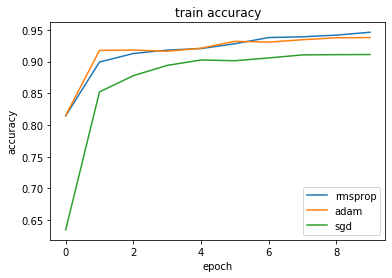

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(history1.history['acc'])  
plt.plot(history2.history['acc'])  
plt.plot(history3.history['acc']) 
plt.title('train accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'sgd'])
plt.figure()

<Figure size 432x288 with 0 Axes>

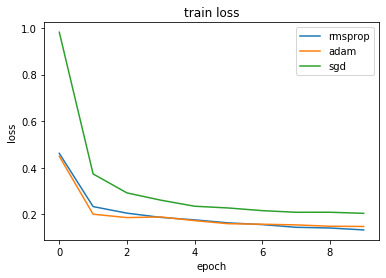

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(history1.history['loss'])  
plt.plot(history2.history['loss'])  
plt.plot(history3.history['loss']) 
plt.title('train loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['rmsprop', 'adam', 'sgd'])
plt.figure()